# KPMG Virtual Internship Project

## Task 2: Data Insights
### Targeting high value customers based on customer demographics and attributes.

KPMG were provided with the following datasets:
 - Customer Demographic 
 - Customer Addresses
 - Transaction data in the past three months

In [1]:
#importing libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='darkgrid')

## Read data

In [2]:
# function to create dataframes from excel sheets
def create_df(filename, sheet_name):
    return pd.read_excel(filename, sheet_name=sheet_name, header=1)

In [3]:
# excel workbook
file = '../data/KPMG_VI_New_raw_data_update_final.xlsx'

## Transactions

In [4]:
# transactions dataframe
transactions = create_df(file, 'Transactions')


In [5]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
# checking for null values
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

There is missing values in the following columns:
- `online_order` : 360
- `brand`: 197
- `product_line`: 197
- `product_class`: 197
- `product_size`: 197
- `standard_cost` : 197
- `product_first_sold_date` : 197

In [8]:
# function to calculate missing percentage
def miss_percent(df, column):
    miss = (df[column].isna().sum() / len(df[column]))*100
    return print(f'There is {miss:.2f} percent of missing values in {column}')

In [9]:
# understanding size of missing values
miss_percent(transactions, 'online_order')
miss_percent(transactions, 'brand')
miss_percent(transactions, 'product_line')
miss_percent(transactions, 'product_class')
miss_percent(transactions, 'product_size')
miss_percent(transactions, 'standard_cost')
miss_percent(transactions, 'product_first_sold_date')

There is 1.80 percent of missing values in online_order
There is 0.98 percent of missing values in brand
There is 0.98 percent of missing values in product_line
There is 0.98 percent of missing values in product_class
There is 0.98 percent of missing values in product_size
There is 0.98 percent of missing values in standard_cost
There is 0.98 percent of missing values in product_first_sold_date


The missing values are not big compared to the total size of the values.
Depending on the analysis, they will be treated accordingly.

In [10]:
# checking for duplicate values
transactions.duplicated().sum()

0

There are no duplicate values.

### Exploring columns

In [11]:
columns = list(transactions.columns)

In [12]:
# function to get value counts
def count_values(df, columns):
    for col in columns:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("\n")

In [13]:
count_values(transactions, columns)

Value counts for transaction_id:
2047     1
10912    1
12947    1
2708     1
661      1
        ..
7481     1
1338     1
3387     1
13628    1
2049     1
Name: transaction_id, Length: 20000, dtype: int64


Value counts for product_id:
0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64


Value counts for customer_id:
2183    14
1068    14
2476    14
2072    13
1672    13
        ..
2395     1
1569     1
1203     1
2271     1
1544     1
Name: customer_id, Length: 3494, dtype: int64


Value counts for transaction_date:
2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64


Value counts for online_order:
1.0    9829
0.0    9811
Name: online_order, dtype: int64


Value counts for order_s

`online_order` seems to contain binary features where `1` might denote `YES` and `0` denotes `NO`.<br>
The client will need to explain that column.

In [14]:
# converting column to datetime
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [15]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56


This column had float data type. The column name states that it is a date hence the conversion<br>
The values however do not seem to be correct because they indicate that the transactions all happened on the same day on different times.

## New Customer List

In [16]:
new_customer_list = create_df(file, 'NewCustomerList')

In [17]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [18]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

There are some unnamed columns that without the clients input, we do not know what they signify. They will be dropped for now

In [19]:
# drop the unnamed columns
new_customer_list.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [20]:
# check missing values
new_customer_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

The following columns contain missing values:
- `last_name` : 29
- `DOB` : 17
- `job_title` : 106
- `job_industry_category` : 165

In [21]:
miss_percent(new_customer_list, 'last_name')
miss_percent(new_customer_list, 'DOB')
miss_percent(new_customer_list, 'job_title')
miss_percent(new_customer_list, 'job_industry_category')

There is 2.90 percent of missing values in last_name
There is 1.70 percent of missing values in DOB
There is 10.60 percent of missing values in job_title
There is 16.50 percent of missing values in job_industry_category


From the percentage seen, appropriate techniques will be used according to the analysis needed.

In [22]:
# check duplicates
new_customer_list.duplicated().sum()

0

There are no duplicated entries

### Exploring columns

In [23]:
columns1 = list(new_customer_list.columns)

In [24]:
count_values(new_customer_list, columns1)

Value counts for first_name:
Rozamond     3
Mandie       3
Dorian       3
Donn         2
Morganica    2
            ..
Chanda       1
Moll         1
Brynn        1
Taber        1
Claudette    1
Name: first_name, Length: 940, dtype: int64


Value counts for last_name:
Sissel           2
Crellim          2
Van den Velde    2
Borsi            2
Eade             2
                ..
Frome            1
Glantz           1
Tansley          1
Janowski         1
Woodroof         1
Name: last_name, Length: 961, dtype: int64


Value counts for gender:
Female    513
Male      470
U          17
Name: gender, dtype: int64


Value counts for past_3_years_bike_related_purchases:
60    20
59    18
70    17
42    17
37    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64


Value counts for DOB:
1961-07-31    2
1994-04-15    2
1987-01-15    2
1951-11-28    2
1979-07-28    2
             ..
1947-04-21    1
1995-10-10    1
1964-08-

`gender` has a value `U` that the client needs to explain what it means.

## Customer Demographic

In [25]:
customer_demographic = create_df(file, 'CustomerDemographic')

In [26]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [27]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [28]:
# check null values
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

The following columns have null values:
- `last_name` : 125
- `DOB` : 87
- `job_title` : 506
- `job_industry_category` : 656
- `default` : 302
- `tenure` : 87

In [29]:
miss_percent(customer_demographic, 'last_name')
miss_percent(customer_demographic, 'DOB')
miss_percent(customer_demographic, 'job_title')
miss_percent(customer_demographic, 'job_industry_category')
miss_percent(customer_demographic, 'default')
miss_percent(customer_demographic, 'tenure')

There is 3.12 percent of missing values in last_name
There is 2.17 percent of missing values in DOB
There is 12.65 percent of missing values in job_title
There is 16.40 percent of missing values in job_industry_category
There is 7.55 percent of missing values in default
There is 2.17 percent of missing values in tenure


The mssing values will be dealt according to the analysis needed due to their sizes.

In [30]:
# check duplicates
customer_demographic.duplicated().sum()

0

There are no duplicates

### Exploring columns

In [31]:
columns2 = list(customer_demographic.columns)

In [32]:
count_values(customer_demographic, columns2)

Value counts for customer_id:
2047    1
657     1
2732    1
681     1
2728    1
       ..
3371    1
1322    1
3367    1
1318    1
2049    1
Name: customer_id, Length: 4000, dtype: int64


Value counts for first_name:
Timmie      5
Max         5
Tobe        5
Kim         4
Urbanus     4
           ..
Iona        1
Palm        1
Claudian    1
Candida     1
Caroline    1
Name: first_name, Length: 3139, dtype: int64


Value counts for last_name:
Ramsdell      3
Pristnor      3
Cliff         2
Pincott       2
Bamlett       2
             ..
Sibson        1
Hanhardt      1
Tolmie        1
Wooldridge    1
Lanning       1
Name: last_name, Length: 3725, dtype: int64


Value counts for gender:
Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64


Value counts for past_3_years_bike_related_purchases:
16    56
19    56
20    54
67    54
2     50
      ..
8     28
86    27
95    27
85    27
92    24
Name: past_3_years_bike_related_pur

The `default` column has values that are not understandable. Without any input about it from the client, it will be dropped.<br>
The `gender` column has some values that can be combined to `female` or `male`. However there is still one, `U`, which the client will need to explain what it means.

In [33]:
# function to replace a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [34]:
customer_demographic.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [35]:
# changing values in gender to either male or female
substitute(customer_demographic, 'gender', ['Femal', 'F', 'M'], ['Female', 'Female', 'Male'])

In [36]:
customer_demographic.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [37]:
# dropping the default column
customer_demographic.drop(columns='default', inplace=True)

In [38]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

## Customer Address

In [39]:
customer_address = create_df(file, 'CustomerAddress')

In [40]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [41]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [42]:
#check null values
customer_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

There are no missing values

In [43]:
# check duplicates
customer_address.duplicated().sum()

0

There are no duplicates

### Exploring the columns

In [44]:
columns3 = list(customer_address.columns)

In [45]:
count_values(customer_address, columns3)

Value counts for customer_id:
2047    1
653     1
2728    1
677     1
2724    1
       ..
3371    1
1322    1
3367    1
1318    1
2049    1
Name: customer_id, Length: 3999, dtype: int64


Value counts for address:
3 Talisman Place           2
64 Macpherson Junction     2
3 Mariners Cove Terrace    2
290 Havey Crossing         1
4 Bayside Place            1
                          ..
5 Kenwood Road             1
042 Bunker Hill Avenue     1
1 Raven Place              1
99488 Mccormick Terrace    1
3748 Lake View Lane        1
Name: address, Length: 3996, dtype: int64


Value counts for postcode:
2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64


Value counts for state:
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


Value counts for country:
Australia    3999
Name: country, 

The column `state` has some entries that can be substituted.

In [46]:
substitute(customer_address, 'state', ['New South Wales', 'Victoria'], ['NSW', 'VIC'])

In [47]:
customer_address.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

# Analysis

## Customer Demographic & Customer Address

In [48]:
customer_demographic = pd.merge(customer_demographic, customer_address, on='customer_id')
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [51]:
# replace 'NA' with NaN
customer_demographic.replace('NaN', pd.NaT, inplace=True)

# drop rows with NaN
customer_demographic.dropna(inplace=True)

In [52]:
# calculate age based on DOB column
customer_demographic['age'] = (datetime.now().year - pd.to_datetime(customer_demographic['DOB']) \ 
                               .dt.year).astype(int)

# drop the DOB column
customer_demographic.drop(columns=['DOB'], inplace=True)

# drop values age greater than 100
customer_demographic.drop(customer_demographic[customer_demographic['age'] >= 100].index, inplace=True)


# show the updated dataframe
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,43
7,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12,50
9,12,Sawyere,Flattman,Male,58,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4,29
10,13,Gabriele,Norcross,Male,38,Developer I,Financial Services,High Net Worth,N,Yes,8.0,2 Sutherland Street,3799,VIC,Australia,6,68


In [53]:
# checking for missing values
customer_demographic.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
age                                    0
dtype: int64

In [54]:
# creating age groups
customer_demographic['age_group'] = ((round(customer_demographic['age'] / 10)) * 10).astype(int)

In [55]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_group
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,70
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,43,40
7,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12,50,50
9,12,Sawyere,Flattman,Male,58,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4,29,30
10,13,Gabriele,Norcross,Male,38,Developer I,Financial Services,High Net Worth,N,Yes,8.0,2 Sutherland Street,3799,VIC,Australia,6,68,70


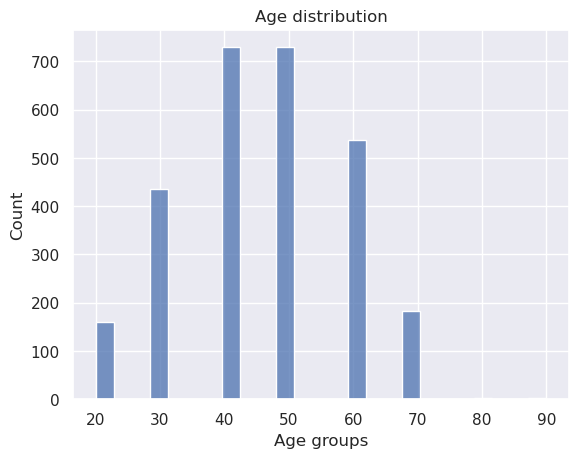

In [172]:
# plot to show age distribution
sns.histplot(customer_demographic, x='age_group')
plt.title('Age distribution')
plt.xlabel('Age groups')
plt.show()

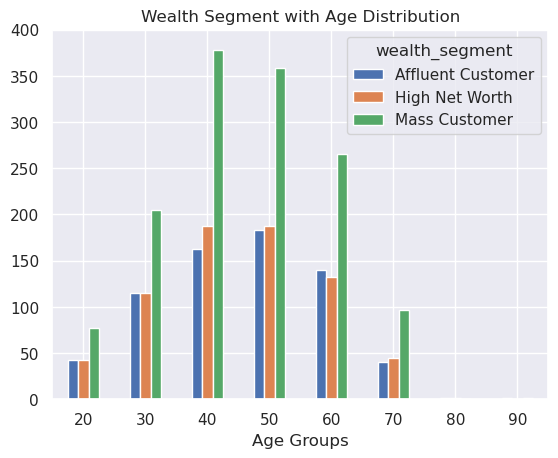

In [57]:
# a plot to show wealth segment against age
customer_demographic.groupby('age_group')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
axes = plt.gca()
axes.set_ylim([0, 400])
plt.title('Wealth Segment with Age Distribution')
plt.xlabel('Age Groups')
plt.xticks(rotation=0)
plt.show()

`Mass customer` is the highest in all age groups. `High net worth` and `affluent customer` have similar numbers with a very small difference.

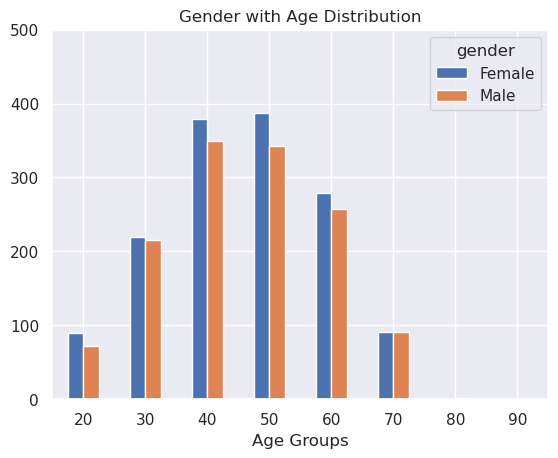

In [58]:

# group the data
age_gender = customer_demographic.groupby('age_group')['gender'].value_counts().unstack(level=1)

# plot the data
ax = age_gender.plot.bar(stacked=False)
ax.set_ylim([0, 500])
ax.set_xticklabels(age_gender.index, rotation=0)
ax.set_title('Gender with Age Distribution')
plt.xlabel('Age Groups')


plt.show()


`female` is higher in more age groups than `male`

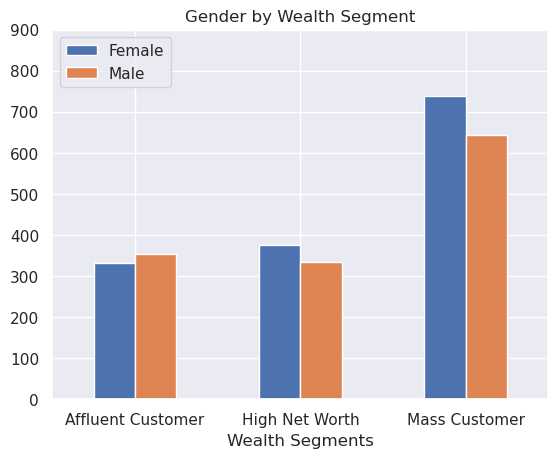

In [128]:
customer_demographic.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)

axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Gender by Wealth Segment')
plt.xticks(rotation=0)
plt.xlabel('Wealth Segments')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

In [63]:
# df to group bike purchases using gender
gender = customer_demographic[['gender', 'past_3_years_bike_related_purchases']]
gender = gender.groupby('gender').sum('past_3_years_bike_related_purchases').reset_index()
gender

,gender,past_3_years_bike_related_purchases
0,Female,69964
1,Male,67337


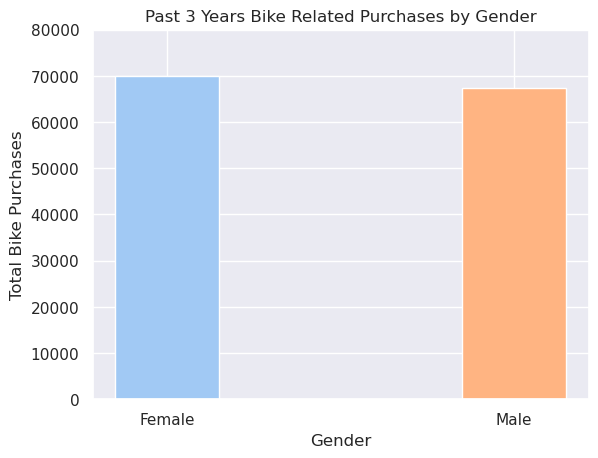

In [65]:
palette = sns.color_palette("pastel")
plt.bar(gender['gender'], gender['past_3_years_bike_related_purchases'], color=palette, width=0.3)

axes = plt.gca()
axes.set_ylim([0, 80000])
plt.title('Past 3 Years Bike Related Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Bike Purchases')
plt.show()

`Female` seem to have a bit higher numbers than `male`

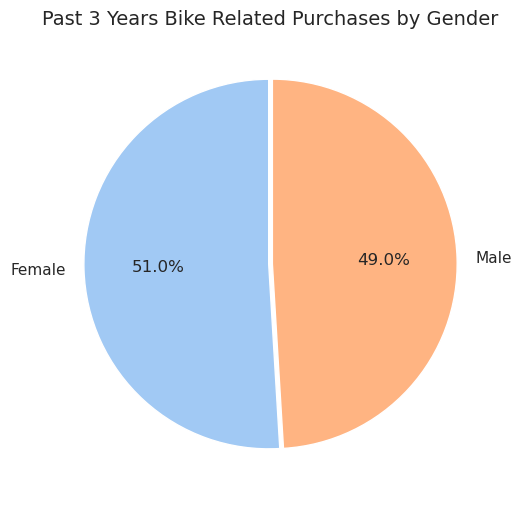

In [68]:
# Create pie chart
palette = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['pink', 'lightblue']
ax.pie(gender['past_3_years_bike_related_purchases'], labels=gender['gender'], colors=palette,
       autopct='%1.1f%%', startangle=90, explode = [0.01, 0.01])

# Add title
ax.set_title('Past 3 Years Bike Related Purchases by Gender', fontsize=14)

# Show plot
plt.show()


In [83]:
# df to show job industries grouped using bike purchases
job_industry = customer_demographic[['job_industry_category', 'past_3_years_bike_related_purchases']]
job_industry = job_industry.groupby('job_industry_category').\
sum('past_3_years_bike_related_purchases').reset_index()
job_industry = job_industry.sort_values(by='past_3_years_bike_related_purchases')
job_industry

,job_industry_category,past_3_years_bike_related_purchases
8,Telecommunications,2480
0,Argiculture,5245
1,Entertainment,5534
4,IT,6213
6,Property,11406
7,Retail,14573
3,Health,26472
2,Financial Services,32042
5,Manufacturing,33336


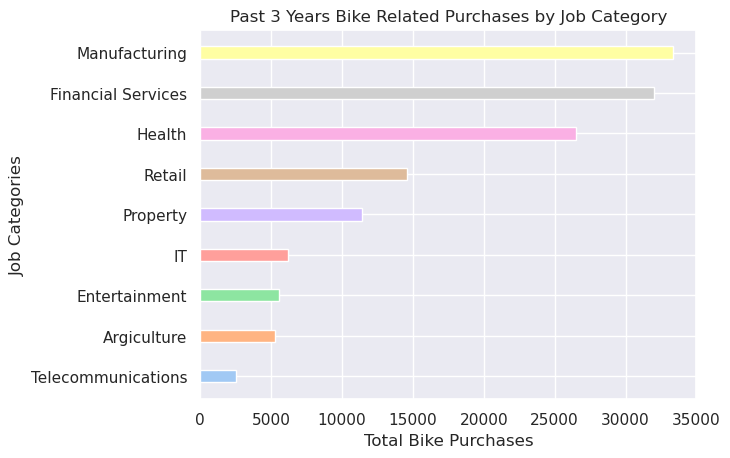

In [84]:
# plot showing how people in different job industries have purchased bikes
plt.barh(job_industry['job_industry_category'], job_industry['past_3_years_bike_related_purchases'], \
        color=palette, height=0.3)

axes = plt.gca()
axes.set_xlim([0, 35000])
plt.title('Past 3 Years Bike Related Purchases by Job Category')
plt.xlabel('Total Bike Purchases')
plt.ylabel('Job Categories')
plt.yticks(rotation=0)
plt.show()

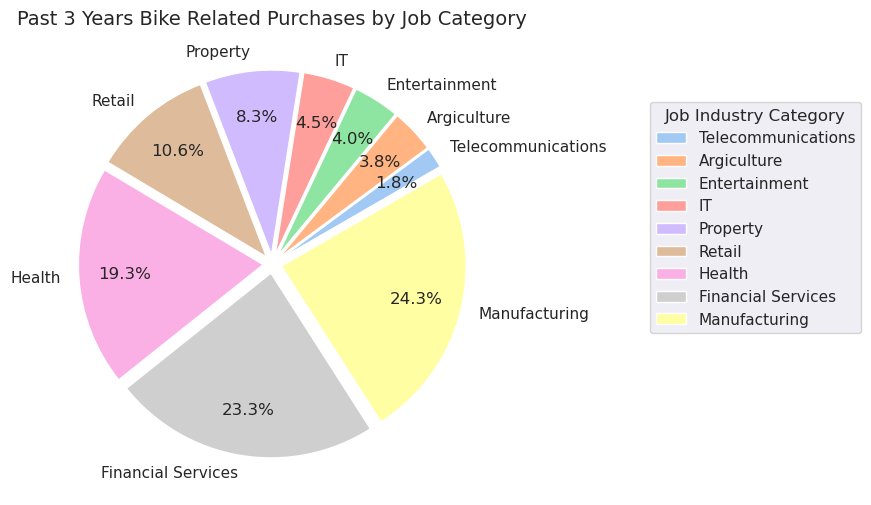

In [99]:
# pie chart for bike purchases across job industries
palette = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(6, 6))

colors = ['pink', 'lightblue']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

ax.pie(job_industry['past_3_years_bike_related_purchases'], labels=job_industry['job_industry_category'], \
       colors=palette,autopct='%1.1f%%', startangle=30, pctdistance=0.75, explode=explode)

# Add legend
ax.legend(title='Job Industry Category', bbox_to_anchor=(1.3, 0.6), loc='center left')

# Add title
ax.set_title('Past 3 Years Bike Related Purchases by Job Category', fontsize=14)

# Show plot
plt.show()


`manufacturing` records the highest numbers followed closely by `financial services` and `health`.

In [86]:
# df showing car owners and bike purchases grouped by bike purchases
car = customer_demographic[['owns_car', 'past_3_years_bike_related_purchases']]
car = car.groupby('owns_car').sum('past_3_years_bike_related_purchases').reset_index()
car = car.sort_values(by='past_3_years_bike_related_purchases', ascending=False)
car

,owns_car,past_3_years_bike_related_purchases
1,Yes,70461
0,No,66840


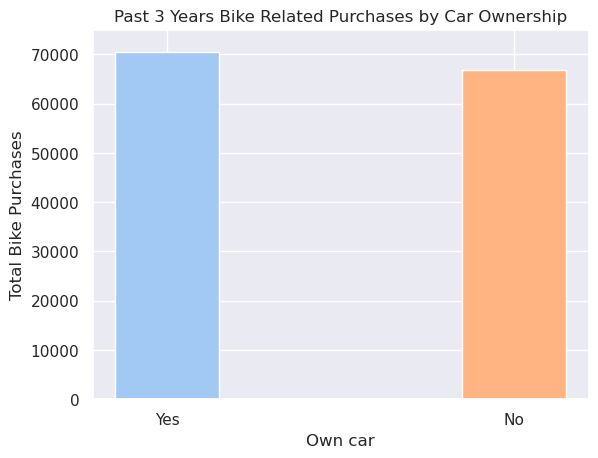

In [100]:
palette = sns.color_palette("pastel")
plt.bar(car['owns_car'], car['past_3_years_bike_related_purchases'], color=palette, width=0.3)

axes = plt.gca()
axes.set_ylim([0, 75000])
plt.title('Past 3 Years Bike Related Purchases by Car Ownership')
plt.xlabel('Own car')
plt.ylabel('Total Bike Purchases')

plt.show()

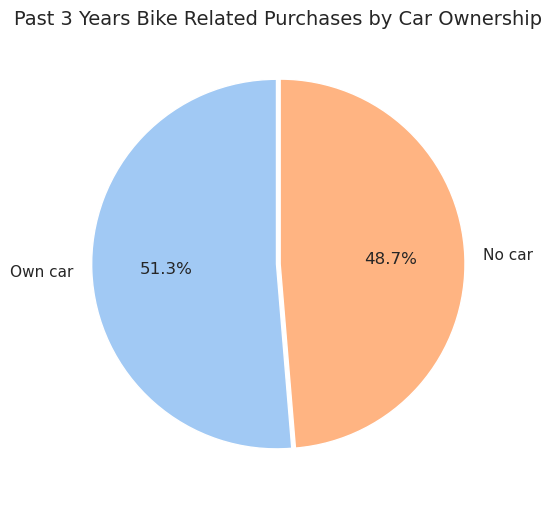

In [101]:
# Create pie chart
palette = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Own car', 'No car']

ax.pie(car['past_3_years_bike_related_purchases'], labels=labels, colors=palette, startangle=90,
       autopct='%1.1f%%',  explode = [0.01, 0.01])

# Add title
ax.set_title('Past 3 Years Bike Related Purchases by Car Ownership', fontsize=14)


# Show plot
plt.show()

individuals with cars seem to also purchase bikes more than those without. That is interesting.

In [96]:
# a df for states grouped by bike purchases
state = customer_demographic[['state', 'past_3_years_bike_related_purchases']]
state = state.groupby('state').sum('past_3_years_bike_related_purchases').reset_index()
state = state.sort_values(by='past_3_years_bike_related_purchases', ascending=False)
state

,state,past_3_years_bike_related_purchases
0,NSW,73698
2,VIC,34419
1,QLD,29184


In [103]:
# Create dictionary of state abbreviations and their full names
state_names = {'NSW': 'New South Wales', 'VIC': 'Victoria', 'QLD': 'Queensland'}

# Replace labels with full state names
state['state'] = state['state'].map(state_names)
state

,state,past_3_years_bike_related_purchases
0,New South Wales,73698
2,Victoria,34419
1,Queensland,29184


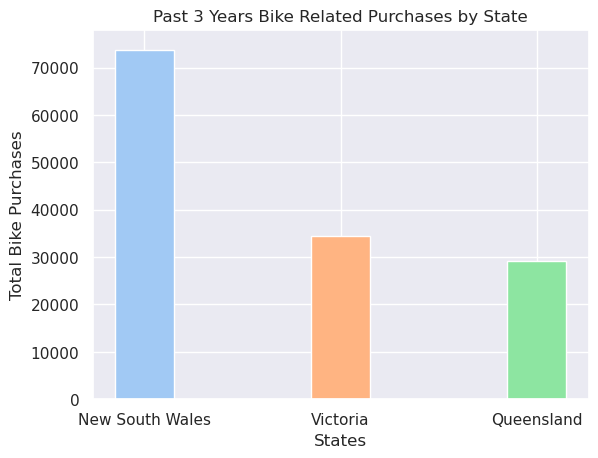

In [104]:
# plot for bike purchases distribution across states
palette = sns.color_palette("pastel")
plt.bar(state['state'], state['past_3_years_bike_related_purchases'], color=palette, width=0.3)

axes = plt.gca()
axes.set_ylim([0, 78000])
plt.title('Past 3 Years Bike Related Purchases by State')
plt.xlabel('States')
plt.ylabel('Total Bike Purchases')

plt.show()

people in `New South Wales(NSW)` have a very high bike purchase record compared to the rest of the states. This can be investigated to determine why. 

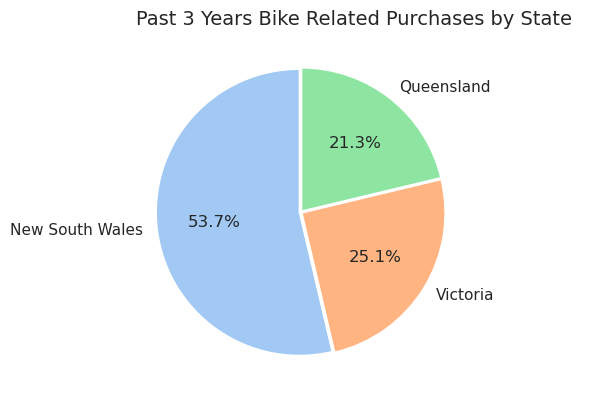

In [106]:
# Create pie chart
palette = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(6, 6))


ax.pie(state['past_3_years_bike_related_purchases'], labels=state['state'], colors=palette, startangle=90,
       autopct='%1.1f%%',  explode = [0.01, 0.01, 0.01])

# Add title
ax.set_title('Past 3 Years Bike Related Purchases by State', fontsize=14)
ax.set_xticks(range(3), ['New South Wales', 'Victoria', 'Queensland'])
# Show plot
plt.show()

In [124]:
state = customer_demographic.groupby(['state', 'age_group']).size().reset_index(name='count')
state = state.sort_values(by='count', ascending=False)
state['state'] = state['state'].map(state_names)
state

,state,age_group,count
3,New South Wales,50,404
2,New South Wales,40,395
4,New South Wales,60,285
1,New South Wales,30,225
16,Victoria,50,182
9,Queensland,40,170
15,Victoria,40,164
17,Victoria,60,149
10,Queensland,50,143
14,Victoria,30,118


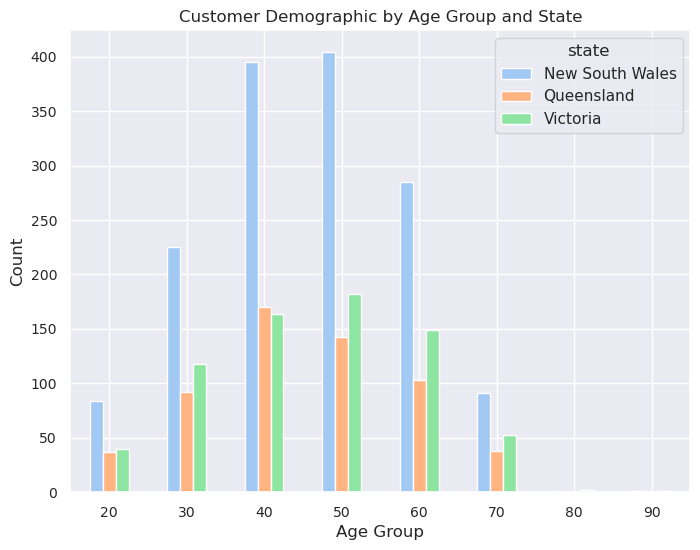

In [126]:
pivoted_state_df = state.pivot_table(index='age_group', columns='state', values='count')

# create  bar chart
fig, ax = plt.subplots(figsize=(8, 6))
pivoted_state_df.plot(kind='bar', ax=ax, color=sns.color_palette("pastel"))
# set axis labels, title, and tick parameters
ax.set_xlabel('Age Group')
ax.set_title('Customer Demographic by Age Group and State')
ax.invert_yaxis()
ax.xaxis.grid(True)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.invert_yaxis()
plt.xticks(rotation=0)

plt.show()





`New South Wales` dominates in every age group.<br>
The age groups `40` and `50` seem to be where most people who made bike related purchases from `New South Wales`